In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np

# Método da Bisseção

## Terorema do valor intermediário

Considere $f(x)$ uma função que possui raízes reais. Dado um intervalo $[a,b]$, se $f(a) \cdot f(b) \le 0$ então existe um $c$ tal que $a \le c \le b$ e $f(c) = 0$

Se verdadeiro, então, se $f(x)$ for derivável em $[a,b]$ e $f'(x)$ preservar o sinal no intervalo, então existe apenas uma única raíz nesse intervalo.

## Implementação

Para a implementação, considere $f(x) = \sqrt{x}-\log_{2}x$ cujas raíz é $x_1 =4, x_2=16$. Então vamos encontrar essas raízes pelo método da bisseção

Primeiro, chutamos um intervalo para começar o método, vamos começar com o intervalo $[-20,20]$

In [21]:
x = np.arange(0.5,20,0.5)

def f(x):
    return np.sqrt(x) - np.log2(x)

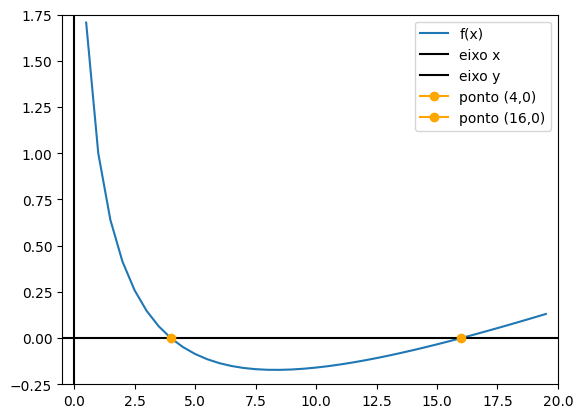

In [54]:
plt.plot(x,f(x))
plt.plot([-1,20], [0,0], color="black")
plt.plot([0,0], [-0.5,2], color="black")
plt.plot(4,0, marker="o", color="orange")
plt.plot(16,0, marker="o", color="orange")
plt.xlim(-0.5,20)
plt.ylim(-0.25,1.75)
plt.legend(["f(x)", "eixo x", "eixo y", "ponto (4,0)", "ponto (16,0)"])
plt.show()